<a href="https://colab.research.google.com/github/hydiexe/machile-learning/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/febbisena/DataMining/main/daily_gold_rate.csv')
df

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.80
...,...,...,...,...,...,...,...
10109,2023-10-02,1833.05,1747.59,1513.92,152333.60,6732.79,13377.60
10110,2023-10-03,1822.45,1741.97,1509.28,151684.52,6693.86,13300.24
10111,2023-10-04,1818.95,1730.36,1496.83,151375.75,6680.82,13274.70
10112,2023-10-05,1819.45,1726.89,1493.80,151431.00,6682.84,13278.35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10114 non-null  object 
 1   USD     10114 non-null  float64
 2   EUR     10114 non-null  float64
 3   GBP     10114 non-null  float64
 4   INR     10114 non-null  float64
 5   AED     10114 non-null  float64
 6   CNY     10110 non-null  float64
dtypes: float64(6), object(1)
memory usage: 553.2+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df.head()

,USD,EUR,GBP,INR,AED,CNY
Date,,,,,,
1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


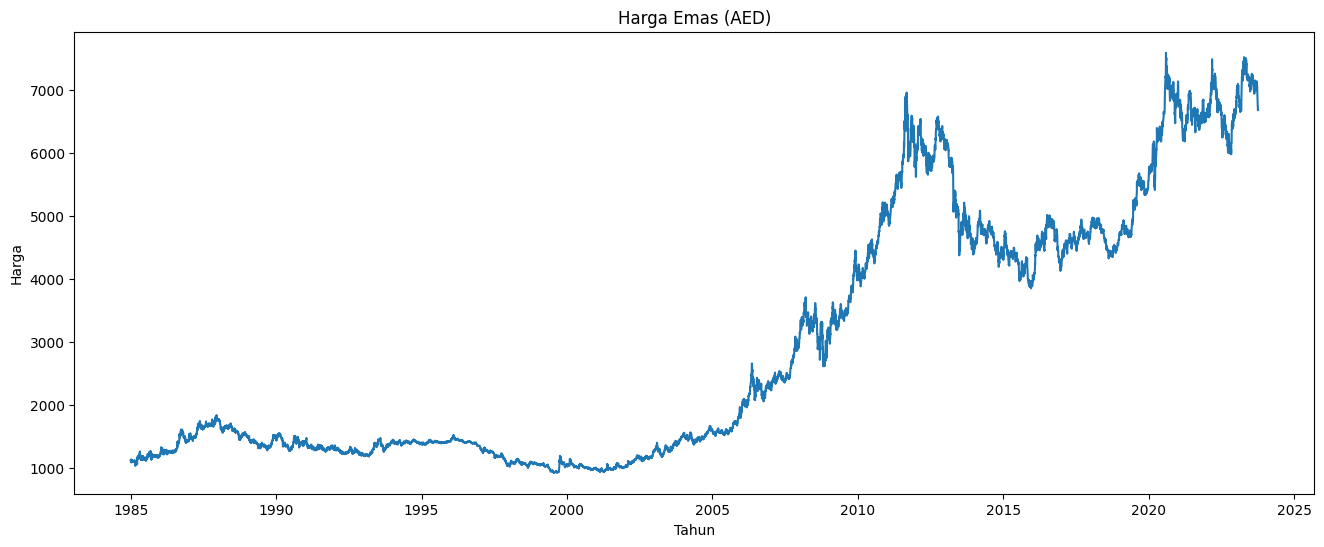

In [9]:
#plot data
plt.figure(figsize=(16, 6))
plt.title("Harga Emas (AED)")
plt.plot(df['AED'])
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.show()

In [10]:
dataset = df[['AED']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [17]:
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 100:]

n_train = train_data.shape[0]
n_test = test_data.shape[0]

print("Jumlah Data Latih:", n_train)
print("Jumlah Data Uji:", n_test)

Jumlah Data Latih: 8091
Jumlah Data Uji: 2123


In [18]:
def create_dataset(data, time_steps=100):
  x, y = [], []
  for i in range (time_steps, len(data)):
    x.append(data[i-time_steps:i])
    y.append(data[i, 0])
  return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

In [21]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64),
    Dense(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 41953 (163.88 KB)
Trainable params: 41953 (163.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
250/250 [==============================] - 9s 12ms/step - loss: 0.0014 - mae: 0.0145
Epoch 2/20
250/250 [==============================] - 2s 9ms/step - loss: 1.5939e-04 - mae: 0.0079
Epoch 3/20
250/250 [==============================] - 2s 10ms/step - loss: 1.2383e-04 - mae: 0.0070
Epoch 4/20
250/250 [==============================] - 2s 10ms/step - loss: 1.1495e-04 - mae: 0.0069
Epoch 5/20
250/250 [==============================] - 3s 11ms/step - loss: 1.0046e-04 - mae: 0.0064
Epoch 6/20
250/250 [==============================] - 3s 12ms/step - loss: 1.0388e-04 - mae: 0.0065
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 9.2999e-05 - mae: 0.0063
Epoch 8/20
250/250 [==============================] - 2s 10ms/step - loss: 7.3421e-05 - mae: 0.0055
Epoch 9/20
250/250 [==============================] - 2s 9ms/step - loss: 7.7823e-05 - mae: 0.0058
Epoch 10/20
250/250 [==============================] - 3s 10ms/step - loss: 6.8918e-05 - mae: 0.0054
Epoch 

In [24]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

64/64 [==============================] - 2s 9ms/step


In [27]:
preds_act = pd.DataFrame(data={'Prediction':pred.flatten(), 'Actuals': y_test.flatten()})
preds_act

,Prediction,Actuals
0,3931.073975,4008.71
1,3965.417236,4063.62
2,4014.740967,4047.10
3,4018.745850,4043.16
4,4011.155762,3986.78
...,...,...
2018,6785.699707,6732.79
2019,6667.837402,6693.86
2020,6617.086914,6680.82
2021,6605.495605,6682.84


from matplotlib import pyplot as plt
preds_act['Prediction'].plot(kind='hist', bins=20, title='Prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
preds_act['Actuals'].plot(kind='hist', bins=20, title='Actuals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
preds_act.plot(kind='scatter', x='Prediction', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
preds_act['Prediction'].plot(kind='line', figsize=(8, 4), title='Prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
preds_act['Actuals'].plot(kind='line', figsize=(8, 4), title='Actuals')
plt.gca().spines[['top', 'right']].set_visible(False)

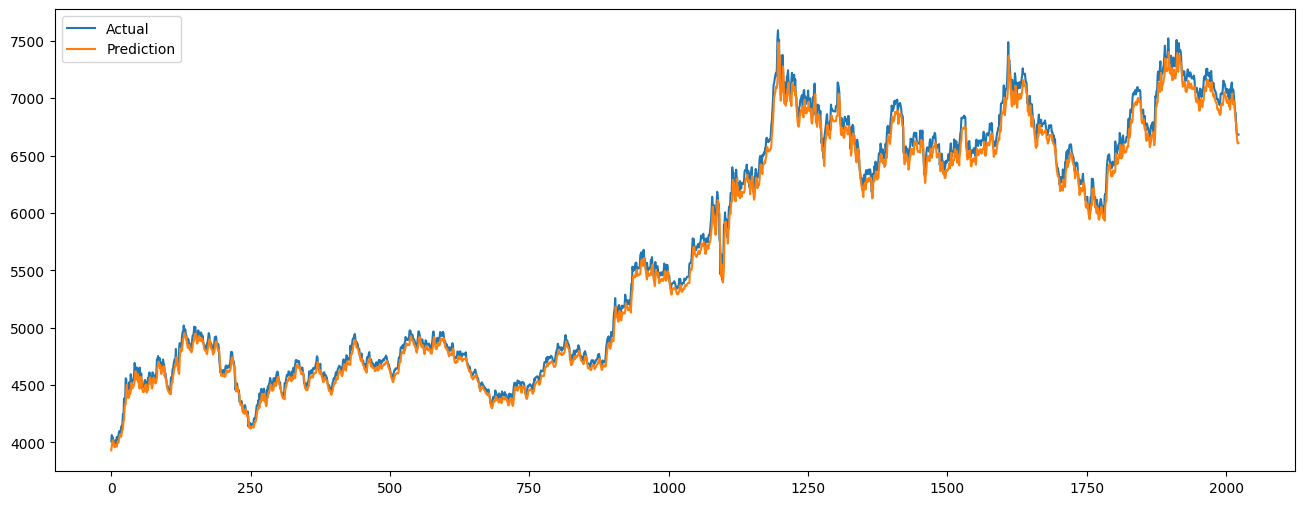

In [28]:
plt.figure(figsize=(16, 6))
plt.plot(y_test, label="Actual")
plt.plot(pred, label="Prediction")
plt.legend()
plt.show()

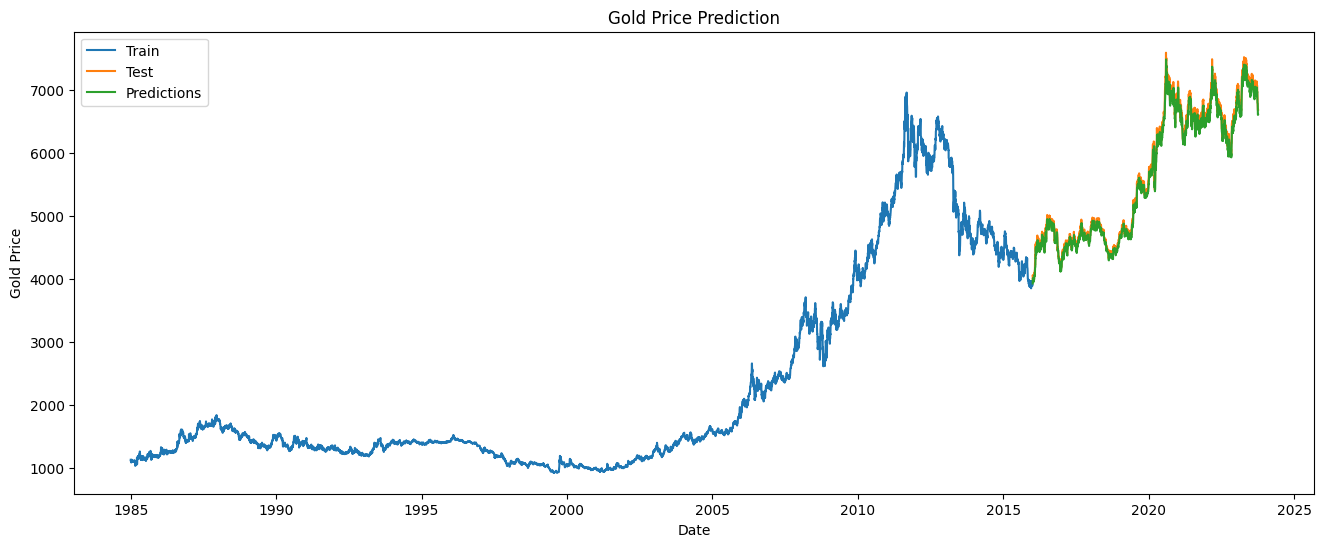

In [33]:
train = dataset.iloc[:train_size]
test = dataset.iloc[train_size:].copy() # Use .copy() to avoid the warning
test.loc[:, 'Predictions'] = pred # Use .loc to assign values

plt.figure(figsize=(16, 6))
plt.plot(train['AED'], label='Train')
plt.plot(test['AED'], label='Test')
plt.plot(test['Predictions'], label='Predictions')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()


In [34]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 85.18101363290465
MAE: 69.5759457884719
